# Practice 2: State space equations for linear time invariant systems


## **Goals for today**

During today's practice:

* we will learn how to define a state space for dynamical systems
* analyze systems stability,


State Space Modeling
1. Mass Spring damper system
2. DC Motor with current (torque)




State-space representation of a linear time invariant (LTI) system with $p$ inputs, $q$ outputs and $n$ state variables is defined as follows:

\begin{equation}
\begin{cases}
\dot{\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u} \\
\mathbf{y} = \mathbf{C} \mathbf{x} + \mathbf{D} \mathbf{u}
\end{cases}
\end{equation}

where
* $\mathbf{x}$ is called state vector, $\mathbf{x} ∈ \mathbb{R}^n$
* $\mathbf{y}$ is called output vector, $\mathbf{y} \in \mathbb{R}^q$


* $\mathbf{A}$: $n \times n$ state matrix
* $\mathbf{B}$: $n \times p$ input matrix
* $\mathbf{C}$: $q \times n$ output matrix
* $\mathbf{D}$: $q \times p$ $direct transmission matrix


## Example: Mass-Spring-Damper system

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1ouEckIc8hm6IOTJ5uGVJHCwx2tBeyKj8" align="center" hspace="350px" vspace="0px"></p>

Consider a mass-spring damper system that is represented by the following differential equation:
\begin{equation}
m\ddot{y} + b\dot{y} + ky = 0
\end{equation}

What we would like to obeserve in this system? Let's say we want to analyze the position and the velocity of the spring. So let's define new variables $x_1$ and $x_2$ that we will call state variables:

\begin{equation}
\mathbf{x} = \begin{bmatrix}
y \\
\dot{y}
\end{bmatrix}
=
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
\end{equation}

Vector $\mathbf{x}$ is a state vector. To see how the state changes over time we need to take the derivative

\begin{equation}
\dot{\mathbf{x}} 
=
\begin{bmatrix}
\dot{y} \\
\ddot{y}
\end{bmatrix}
=
\begin{bmatrix}
\dot{y} \\
\frac{1}{m}(-b\dot{y}-ky)
\end{bmatrix} 
\end{equation}

\begin{equation}
= \begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2
\end{bmatrix}
= 
\begin{bmatrix}
x_2 \\
\frac{1}{m}(-bx_2 - kx_1)
\end{bmatrix}
=
\underbrace{
  \begin{bmatrix}
  0 & 1\\
  -\frac{k}{m} & -\frac{b}{m}
  \end{bmatrix}
}_\mathbf{A}
\underbrace{
  \begin{bmatrix}
  x_1 \\
  x_2 \\
  \end{bmatrix}
}_\mathbf{x}
\end{equation}



State Space Model:
* allows to reduce the order of the differentail euqation
* represents the dynamic equations in the form $\dot{\mathbf{x}} = \mathbf{A}\mathbf{x}$

To analyze the stability of the system one should compute the eigenvalues of matrix $\mathbf{A}$.

In [ ]:
from numpy.linalg import eig
from numpy import real

m = 1
b = 2
k = 5

A = [[0,1],
     [-k/m, -b/m]]
 
lambdas, Q = eig(A) # lambdas is the array of eigenvalues and Q is the matrix of eigenvectors on its columns v = Q[:,i]
print(f'Eigen values:\n {lambdas}')
print(f'Real parts:\n {real(lambdas)}')

Eigen values:
 [-1.+2.j -1.-2.j]
Real parts:
 [-1. -1.]


Now let's integrate the system using function **odeint** and see how the system changes over time.

In [ ]:
from numpy import dot, linspace
from scipy.integrate import odeint


def mbk_ode(x, t, A):
    dx = dot(A,x)
    return dx


t0 = 0 # Initial time 
tf = 15 # Final time
N = int(2E3) # Numbers of points in time span
t = linspace(t0, tf, N) # Create time span
x0 = [1,1] # Initial state

x_sol = odeint(mbk_ode, x0, t, args=(A,)) # integrate system mbk_ode from initial state x0
y, dy = x_sol[:,0], x_sol[:,1] # set y, dy to be a respective solution of system states

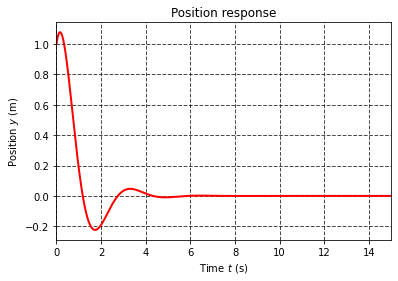

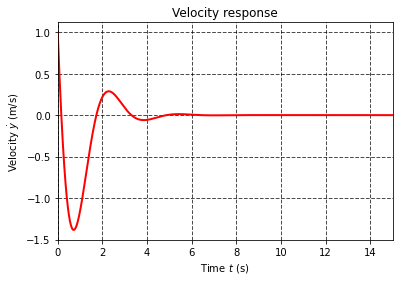

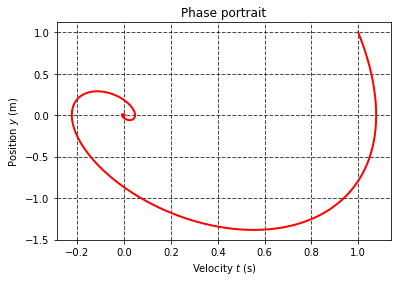

In [ ]:
from matplotlib.pyplot import *

title(r'Position response')
plot(t, y, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${y}$ (m)')
xlabel(r'Time $t$ (s)')
show()

title(r'Velocity response')
plot(t, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Velocity $\dot{y}$ (m/s)')
xlabel(r'Time $t$ (s)')
show()

title(r'Phase portrait')
plot(y, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Position ${y}$ (m)')
xlabel(r'Velocity $t$ (s)')
show()

### **Mass-Spring-Damper system with control input**
Consider the differential equation with input $u$
\begin{equation}
m\ddot{y} + b\dot{y} + ky= u
\end{equation}

And output equation (the equation that tells us what we want to get/measure in the output) $z=x_1$. The state equation can be written as


\begin{equation}
\dot{\mathbf{x}} 
=
\begin{bmatrix}
\dot{y} \\
\ddot{y}
\end{bmatrix}
=
\underbrace{
  \begin{bmatrix}
  0 & 1\\
  -\frac{k}{m} & -\frac{b}{m}
  \end{bmatrix}
}_\mathbf{A}
\underbrace{
  \begin{bmatrix}
  x_1 \\
  x_2 \\
  \end{bmatrix}
}_\mathbf{x} 
+ 
\underbrace{
  \begin{bmatrix}
  0 \\
  \frac{1}{m}
  \end{bmatrix}
}_\mathbf{B}
u
\end{equation}



Finally, from the system of equations
\begin{equation}
\begin{cases}
m\ddot{y} + b\dot{y} + ky = u \\
z = y
\end{cases}
\end{equation}

we get the following state space equations for the mass-pring-damper
\begin{equation}
\begin{cases}
\dot{\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u} \\
\mathbf{z} = \mathbf{C} \mathbf{x} + \mathbf{D} \mathbf{u}
\end{cases}
\end{equation}
where
\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
  0 & 1\\
  -\frac{k}{m} & -\frac{b}{m}
  \end{bmatrix}
\quad
\mathbf{B} = 
  \begin{bmatrix}
  0 \\
  \frac{1}{m}
  \end{bmatrix}
\end{equation}

\begin{equation}
\mathbf{С} = 
  \begin{bmatrix}
  1 & 0\\
  \end{bmatrix}
\quad 
\mathbf{D} = 
  \begin{bmatrix}
  0 & 0\\
  \end{bmatrix}
\end{equation}

## **Example: DC Motor**


The equation of motion for a DC motor:
\begin{equation}
J\ddot{\theta} + b \dot{\theta} = u
\end{equation}
where $J$ is the motor inertia, $b$ represents the damping.

For this system let's define the control input $u$ on the motor
\begin{equation}
u = K_p \tilde{\theta} + K_d \dot{\tilde \theta}
\end{equation}

where $\tilde{\theta} = \theta_d - \theta$

Now we can substitute the input $u$ to the initial differential equation and get

\begin{equation}
J\ddot{\tilde{\theta}} + (b+K_d)  \dot{\tilde{\theta}} + K_p \tilde{\theta} = 0
\end{equation}

In [1]:
from numpy.linalg import eig
from numpy import real, array

J = 1
b = 2

A = [[0,1],
     [0, -b/J]]
A = array([[0, 1], [0, -b/J]])

B = array([0, 1/J])
 
# find the eigenvalues of matrix A

In [5]:
from numpy import dot, linspace
from scipy.integrate import odeint


theta_d = 0

def harmonic_ode(x, t, A, B):
    # get the control

    # write the system in the form
    # dx = Ax + Bu
    # return dx
    u = control(x0[0], x0[1])
    dx = dot(A, x) + dot(B, u)
    return dx

def control(theta, dtheta):
    Kd = 10
    Kp = 5
    return (dtheta-theta) * Kp + (-dtheta) * Kd

t0 = 0 # Initial time 
tf = 15 # Final time
N = int(2E3) # Numbers of points in time span
t = linspace(t0, tf, N) # Create time span
x0 = [1,1] # Initial state


x_sol = odeint(harmonic_ode, x0, t, args=(A, B, )) # integrate system mbk_ode from initial state x0
y, dy = x_sol[:,0], x_sol[:,1] # set y, dy to be a respective solution of system states

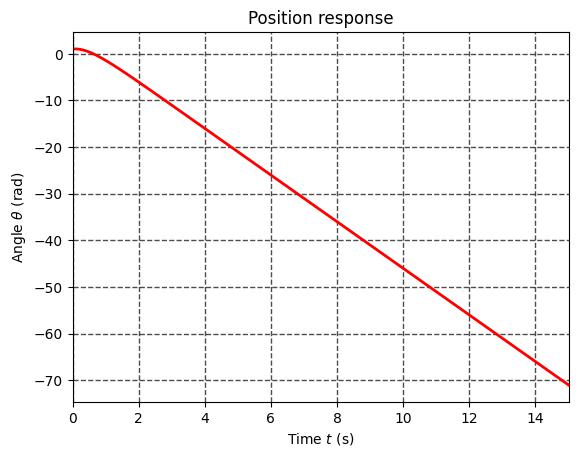

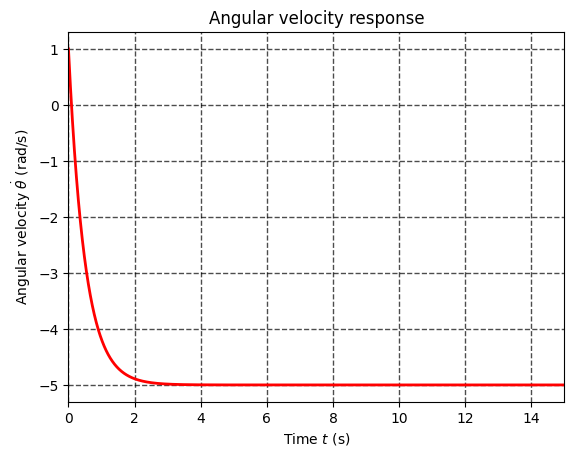

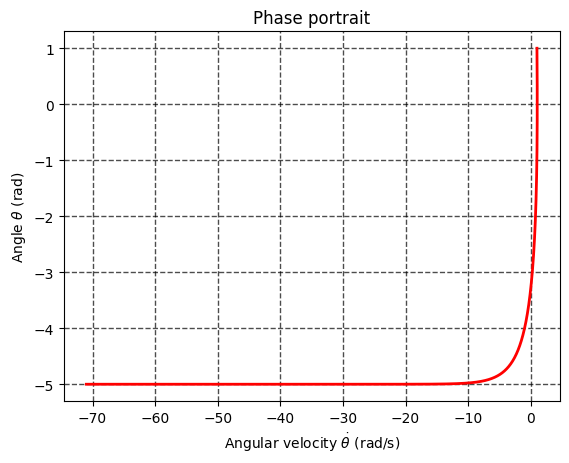

In [6]:
from matplotlib.pyplot import *

title(r'Position response')
plot(t, y, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Angle ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

title(r'Angular velocity response')
plot(t, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Angular velocity $\dot{\theta}$ (rad/s)')
xlabel(r'Time $t$ (s)')
show()

title(r'Phase portrait')
plot(y, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Angle ${\theta}$ (rad)')
xlabel(r'Angular velocity $\dot{\theta}$ (rad/s)')
show()

## Tuning second order systems

Now let's consider the second-order linear system described by 
\begin{equation}
\ddot{x} + a \dot{x} + bx = 0 ⇔
\ddot{x} + 2 \zeta \omega_n \dot{x} + \omega_n^2 x = 0
\end{equation}
where $\omega_n$ is called **natural frequency** (which is the frequency of oscillations whne there is no damping) and $\zeta$ is **damping ratio** (it descrides how fast the system will damp). This equation is more general than just the mass–spring system, and also applies to electrical circuits and to other domains.

Recall the error dynamics of a harmonic drive: 
\begin{equation}
\ddot{\tilde{\theta}} + \frac{(b+K_d)}{J}  \dot{\tilde{\theta}} + \frac{K_p}{J} \tilde{\theta} = 0
\end{equation}

From the last two equations we see that

\begin{equation}
2\zeta \omega_n = \frac{b+K_d}{J}
\end{equation}

\begin{equation}
\omega_n ^2 = \frac{K_p}{J}
\end{equation}

**Properties:**

* If $\zeta = 0$, then we get **undamped system**
* $0<\zeta<1 ⇒$ **underdamped system** 
* $\zeta=1 ⇒$ **critically damped** system 
* $\zeta > 1 ⇒$ **overdamped** system 

What is remarkable in this approach is that by tuning parameters $\zeta$, $\omega_n$ we can get automatically the control gains $K_p$, $K_d$.

In [ ]:
omega_n = 3
zeta = 1

J = 1
b = 2

A = array([[0, 1], [0, -b/J]])

B = array([0, 1/J])
 
lambdas, Q = eig(A) # lambdas is the array of eigenvalues and Q is the matrix of eigenvectors on its columns v = Q[:,i]
print(f'Eigen values:\n {lambdas}')
print(f'Real parts:\n {real(lambdas)}')

Eigen values:
 [ 0. -2.]
Real parts:
 [ 0. -2.]


In [ ]:
theta_d = 1

def dc_ode(x, t, A, B):
    u = control(x[0], x[1])
    dx = A @ x + B * u 
    return dx

def control(theta, dtheta):
    # write formulas for Kp and Kd using zeta adn omega notation
    # Kp = ?
    # Kd = ?
  
    u = Kp * (theta_d - theta) + Kd * (-dtheta)
    return u

t0 = 0 # Initial time 
tf = 15 # Final time
N = int(2E3) # Numbers of points in time span
t = linspace(t0, tf, N) # Create time span
x0 = [0,0] # Initial state


x_sol = odeint(dc_ode, x0, t, args=(A, B, )) # integrate system mbk_ode from initial state x0
y, dy = x_sol[:,0], x_sol[:,1] # set y, dy to be a respective solution of system states

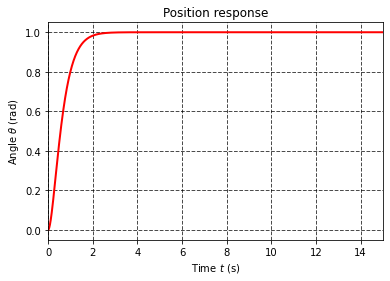

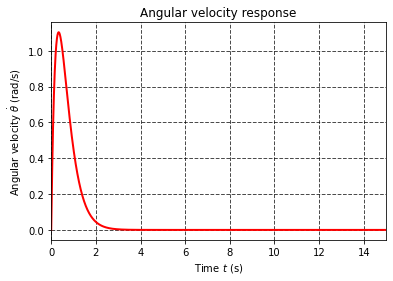

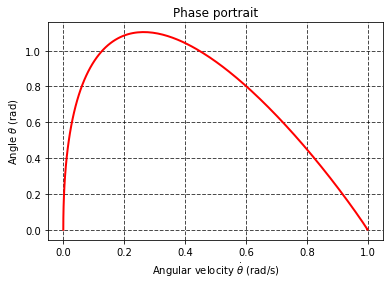

In [ ]:
from matplotlib.pyplot import *

title(r'Position response')
plot(t, y, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Angle ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

title(r'Angular velocity response')
plot(t, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Angular velocity $\dot{\theta}$ (rad/s)')
xlabel(r'Time $t$ (s)')
show()

title(r'Phase portrait')
plot(y, dy, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Angle ${\theta}$ (rad)')
xlabel(r'Angular velocity $\dot{\theta}$ (rad/s)')
show()

## DC Motor Load angle and Motor angle Control
DC Motor consists of the actuator, the load and a torsional spring locating between them.

<p><img alt="harmonic" height="500px" src="https://www.researchgate.net/publication/334030874/figure/fig12/AS:774150784303104@1561583338942/Exploded-view-of-the-different-parts-of-a-harmonic-drive-top-and-a-detailed.png" align="center" hspace="350px" vspace="0px"></p>






Consider the idealized model of a harmonic drive. 

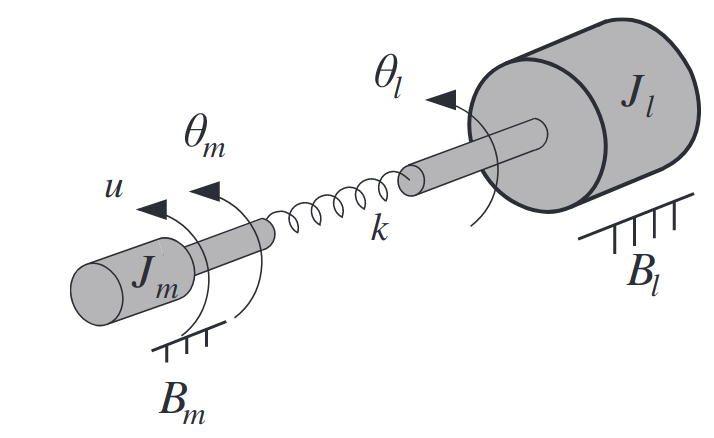


The equation of motion for a DC motor is

\begin{equation}
J_l \ddot{\theta}_l + b_l \dot{\theta}_l + k(\theta_l - \theta_m) = 0 \\
J_m \ddot{\theta}_m + b_m \dot{\theta}_m - k (\theta_l - \theta_m) = u
\end{equation}
where 
* $J_l, J_m$: load and motor inertias
* $b_l, b_m$: damping constants
* $k$: stiffness of the harmonic drive gears.

State space model with state space variable vector $\mathbf{x} = [\theta_l, \theta_m, \dot{\theta}_l, \dot{\theta}_m]^T = [x_1, x_2, x_3, x_4]^T$ will be as follows

\begin{equation}
\begin{cases}
\dot{x}_1 = x_2 \\
\dot{x}_2 = \frac{1}{J_l} (- k x_1 - b_l x_2 + k x_3 ) \\
\dot{x}_3 = x_4 \\
\dot{x}_4 = \frac{1}{J_m} (k x_1 - b_m x_4 - k x_3 + u) 
\end{cases}
\end{equation}

In result, the matrix form $\dot{\mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B} u$ will be with matrices

\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
0 & 1 & 0 & 0 \\
-\frac{k}{J_l} & -\frac{b_l}{J_l} & \frac{k}{J_l} & 0 \\
0 & 0 & 0 & 1\\
\frac{k}{J_m} & 0 & -\frac{k}{J_m} & -\frac{b_m}{J_m}
\end{bmatrix}
\end{equation}

\begin{equation}
\mathbf{B} = 
\begin{bmatrix}
0 \\ 0\\ 0\\ \frac{1}{J_m}
\end{bmatrix}
\end{equation}

In [8]:
omega_n = 5
zeta = 1

k = 200

Jl = 1
bl = 2

Jm = 1
bm = 2

A = array([[0, 1, 0, 0], 
           [-k/Jl, -bl/Jl, k/Jl, 0], 
           [0, 0, 0, 1], 
           [k/Jm, 0, -k/Jm, -bm/Jm]])

B = array([0, 0, 0, 1/Jm])
# B = B.reshape(4,1)

In [13]:
theta_dl = 1
theta_dm = 1


def dc_ode(x, t, A, B):
    u = control(x[0], x[1], x[2], x[3])
    dx = A @ x + B * u 
    return dx.reshape(4,)


def control(theta_l, dtheta_l, theta_m, dtheta_m):
    kp_l, kd_l, kp_m, kd_m =15, 10, 10, 10
    # write the control for a load
    u_l = kp_l * (theta_dl - theta_l) - kd_l * dtheta_l
    # write the control for a motor
    u_m = kp_m * (theta_dm - theta_m) - kd_m * dtheta_m
    # return total value of the control
    return u_m


t0 = 0                    # Initial time 
tf = 15                   # Final time
N = int(2E3)              # Numbers of points in time span
t = linspace(t0, tf, N)   # Create time span
x0 = [0, 0, 0, 0]         # Initial state


# gains for load
Kpl = 0
Kdl = 0

# gains for motor
Kpm = Jm * omega_n ** 2
Kdm = 2 * zeta * omega_n * Jm - bm

x_sol = odeint(dc_ode, x0, t, args=(A, B, )) # integrate system mbk_ode from initial state x0
theta_load, dtheta_load, theta_motor, dtheta_motor = x_sol[:,0], x_sol[:,1], x_sol[:,2], x_sol[:,3] # set y, dy to be a respective solution of system states

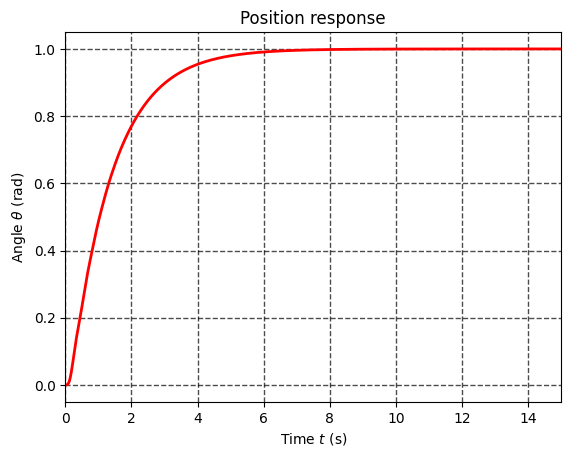

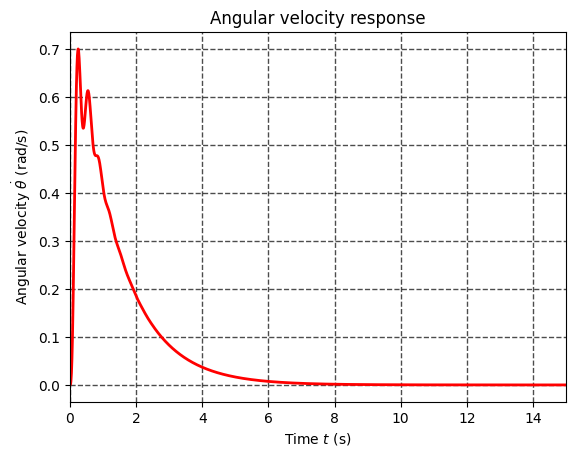

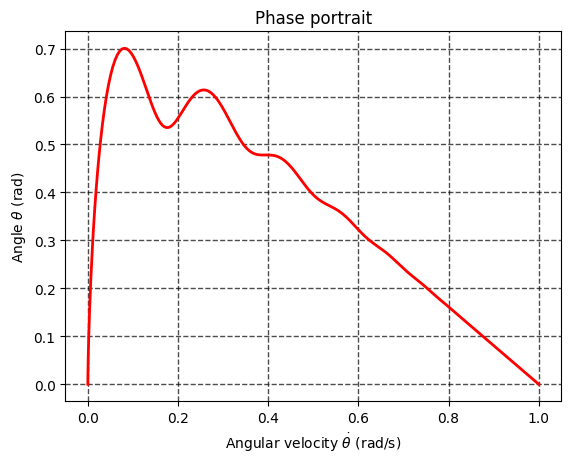

In [14]:
from matplotlib.pyplot import *

title(r'Position response')
plot(t, theta_load, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Angle ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

title(r'Angular velocity response')
plot(t, dtheta_load, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Angular velocity $\dot{\theta}$ (rad/s)')
xlabel(r'Time $t$ (s)')
show()

title(r'Phase portrait')
plot(theta_load, dtheta_load, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Angle ${\theta}$ (rad)')
xlabel(r'Angular velocity $\dot{\theta}$ (rad/s)')
show()

## Pole placement

Recall the linear system in state space form:
\begin{equation}
\mathbf{\dot{x}}=\mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u}
\end{equation}

The general form of feedback that may stabilize our system is know to be linear:
\begin{equation}
\mathbf{u}=-\mathbf{K}\mathbf{x}
\end{equation}

Substitution to the system dynamics yields:
\begin{equation}
\mathbf{\dot{x}}=(\mathbf{A} - \mathbf{B}\mathbf{K})\mathbf{x} = \mathbf{A}_c\mathbf{x}
\end{equation}
Thus the stability of the controlled system is completely determined by the eigen values of $\mathbf{A}_c$ and consequantially by the matrix $\mathbf{K}$

In [ ]:
K = np.array([Kpl, Kdl, Kpm, Kdm])
A - B.reshape(4,1) @ K.reshape(1,4)
real(eig(A - B.reshape(4,1) @ K.reshape(1,4))[0])

array([-3.00521227, -3.00521227, -2.99478773, -2.99478773])

In [ ]:
from scipy.signal import place_poles

B = B.reshape(4,1)
P = array([-1, -1.1, -1.5, -2])

Gains = place_poles(A, B, P)
G = Gains.gain_matrix

In [ ]:
# check
eig(A - B @ G)[0]

array([-1. , -1.1, -1.5, -2. ])